In [74]:
import pandas as pd
from ml_utilities import ml_utilities
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

%matplotlib inline

# config for show max number of output lines
pd.options.display.max_colwidth = 600
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

In [2]:
def plot_distribution(data, feature, color='blue'):
    plt.figure(figsize=(10,6))
    plt.title("Distribution of %s" % feature)
    sns.distplot(data[feature].dropna(), color=color, kde=True,bins=100)
    plt.show()

## Meta 

In [3]:
meta = pd.read_csv('../../data/raw/meta.csv')

In [4]:
meta.head()

,series_id,surface,base_temperature,monday_is_day_off,tuesday_is_day_off,wednesday_is_day_off,thursday_is_day_off,friday_is_day_off,saturday_is_day_off,sunday_is_day_off
0,100003,x-large,low,False,False,False,False,False,True,True
1,100004,x-large,low,False,False,False,False,False,True,True
2,100006,x-small,low,False,False,False,False,False,True,True
3,100008,x-small,low,False,False,False,False,False,True,True
4,100010,x-small,low,False,False,False,False,False,True,True


In [5]:
meta_preview = ml_utilities.generate_preview(meta)

In [6]:
meta_preview

,index,dtypes,first_value,null_count,null_ratio
0,series_id,int64,100003,0,0.0
1,surface,object,x-large,0,0.0
2,base_temperature,object,low,0,0.0
3,monday_is_day_off,bool,False,0,0.0
4,tuesday_is_day_off,bool,False,0,0.0
5,wednesday_is_day_off,bool,False,0,0.0
6,thursday_is_day_off,bool,False,0,0.0
7,friday_is_day_off,bool,False,0,0.0
8,saturday_is_day_off,bool,True,0,0.0
9,sunday_is_day_off,bool,True,0,0.0


In [7]:
meta.shape

(1383, 10)

In [8]:
meta['surface'].unique()

array(['x-large', 'x-small', 'medium', 'large', 'xx-large', 'xx-small',
       'small'], dtype=object)

In [9]:
meta['base_temperature'].unique()

array(['low', 'high'], dtype=object)

### Surface Distribution

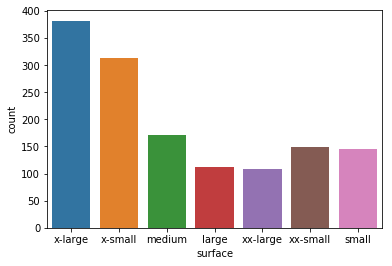

In [10]:
sns.countplot(x='surface', data=meta)

### Base Temperature Distribution

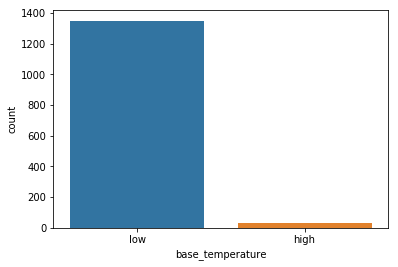

In [11]:
sns.countplot(x='base_temperature', data=meta)

### Dayoff

In [12]:
days = [
    'monday_is_day_off', 'tuesday_is_day_off', 'wednesday_is_day_off', 'thursday_is_day_off',
    'friday_is_day_off', 'saturday_is_day_off', 'sunday_is_day_off'
]

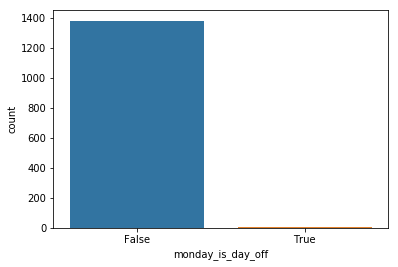

In [13]:
sns.countplot(x='monday_is_day_off', data=meta)

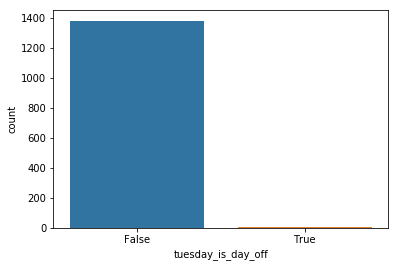

In [14]:
sns.countplot(x='tuesday_is_day_off', data=meta)

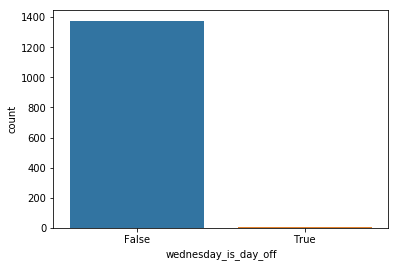

In [15]:
sns.countplot(x='wednesday_is_day_off', data=meta)

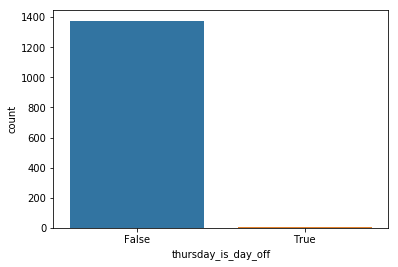

In [16]:
sns.countplot(x='thursday_is_day_off', data=meta)

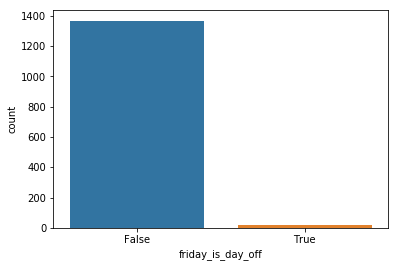

In [17]:
sns.countplot(x='friday_is_day_off', data=meta)

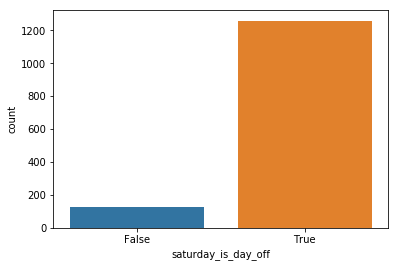

In [18]:
sns.countplot(x='saturday_is_day_off', data=meta)

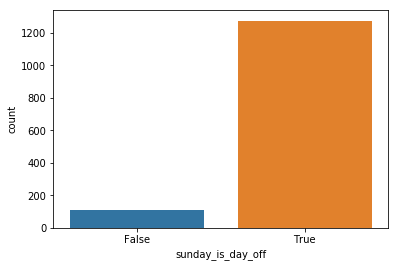

In [19]:
sns.countplot(x='sunday_is_day_off', data=meta)

### Total off day

In [20]:
for day in days:
    meta[day] = meta[day].astype(int)

In [21]:
meta.head()

,series_id,surface,base_temperature,monday_is_day_off,tuesday_is_day_off,wednesday_is_day_off,thursday_is_day_off,friday_is_day_off,saturday_is_day_off,sunday_is_day_off
0,100003,x-large,low,0,0,0,0,0,1,1
1,100004,x-large,low,0,0,0,0,0,1,1
2,100006,x-small,low,0,0,0,0,0,1,1
3,100008,x-small,low,0,0,0,0,0,1,1
4,100010,x-small,low,0,0,0,0,0,1,1


In [22]:
meta['total_off_day'] = meta['monday_is_day_off'] + meta['tuesday_is_day_off'] + meta['wednesday_is_day_off'] + \
    meta['thursday_is_day_off'] + meta['friday_is_day_off'] + meta['saturday_is_day_off'] + meta['sunday_is_day_off']

In [23]:
meta[['series_id', 'total_off_day']].head()

,series_id,total_off_day
0,100003,2
1,100004,2
2,100006,2
3,100008,2
4,100010,2


In [24]:
meta['total_off_day'].min()

0

In [25]:
meta['total_off_day'].max()

7

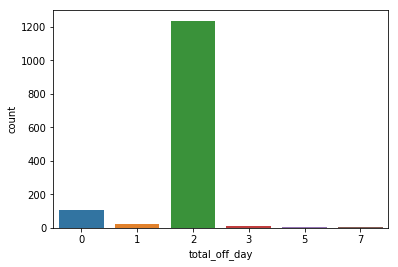

In [26]:
sns.countplot(x='total_off_day', data=meta)

## Train and Test

In [27]:
train = pd.read_csv('../../data/raw/consumption_train.csv')
test = pd.read_csv('../../data/raw/cold_start_test.csv')

## Train Data

In [28]:
train.shape

(509376, 5)

In [29]:
train = train.drop('Unnamed: 0', axis=1)

In [52]:
train['microsecond'] = train.timestamp.apply(lambda x: int(datetime.strptime(x, '%Y-%m-%d %H:%M:%S').strftime('%s')))

In [53]:
train.head()

,series_id,timestamp,consumption,temperature,microsecond
0,103088,2014-12-24 00:00:00,101842.233424,NaN,1419354000
1,103088,2014-12-24 01:00:00,105878.048906,NaN,1419357600
2,103088,2014-12-24 02:00:00,91619.105008,NaN,1419361200
3,103088,2014-12-24 03:00:00,94473.706203,NaN,1419364800
4,103088,2014-12-24 04:00:00,96976.755526,NaN,1419368400


In [54]:
train_preview = ml_utilities.generate_preview(train)

In [55]:
train_preview

,index,dtypes,first_value,null_count,null_ratio
0,series_id,int64,103088,0,0.000000
1,timestamp,object,2014-12-24 00:00:00,0,0.000000
2,consumption,float64,101842,0,0.000000
3,temperature,float64,NaN,228689,44.895912
4,microsecond,int64,1419354000,0,0.000000


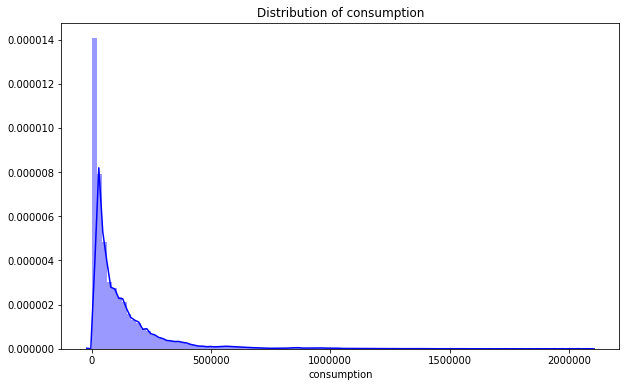

In [35]:
plot_distribution(train, 'consumption')

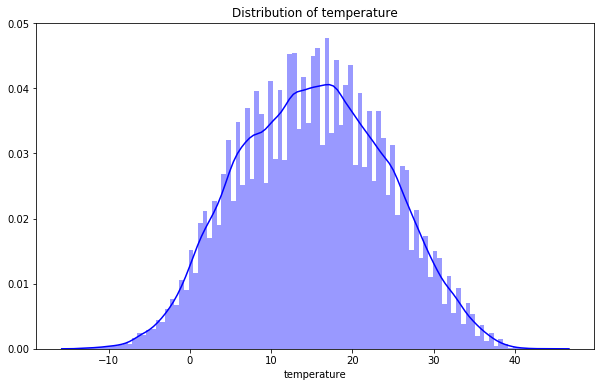

In [36]:
plot_distribution(train, 'temperature')

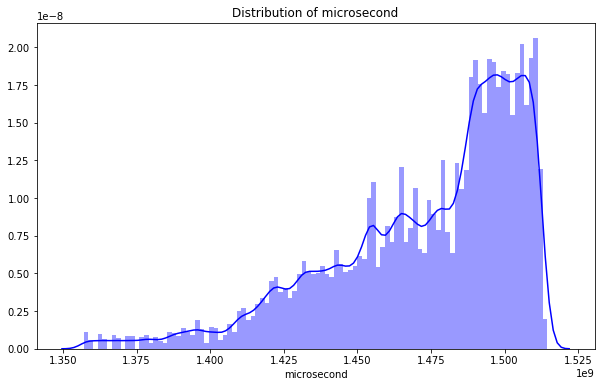

In [56]:
plot_distribution(train, 'microsecond')

## Test Data

In [57]:
test.shape

(111984, 4)

In [ ]:
test = test.drop('Unnamed: 0', axis=1)

In [59]:
test['microsecond'] = test.timestamp.apply(lambda x: int(datetime.strptime(x, '%Y-%m-%d %H:%M:%S').strftime('%s')))

In [60]:
test.head()

,series_id,timestamp,consumption,temperature,microsecond
0,102781,2013-02-27 00:00:00,15295.740389,17.00,1361898000
1,102781,2013-02-27 01:00:00,15163.209562,18.25,1361901600
2,102781,2013-02-27 02:00:00,15022.264079,18.00,1361905200
3,102781,2013-02-27 03:00:00,15370.420458,17.00,1361908800
4,102781,2013-02-27 04:00:00,15303.103213,16.90,1361912400


In [61]:
test_preview = ml_utilities.generate_preview(test)

In [62]:
test_preview

,index,dtypes,first_value,null_count,null_ratio
0,series_id,int64,102781,0,0.000000
1,timestamp,object,2013-02-27 00:00:00,0,0.000000
2,consumption,float64,15295.7,0,0.000000
3,temperature,float64,17,44916,40.109301
4,microsecond,int64,1361898000,0,0.000000


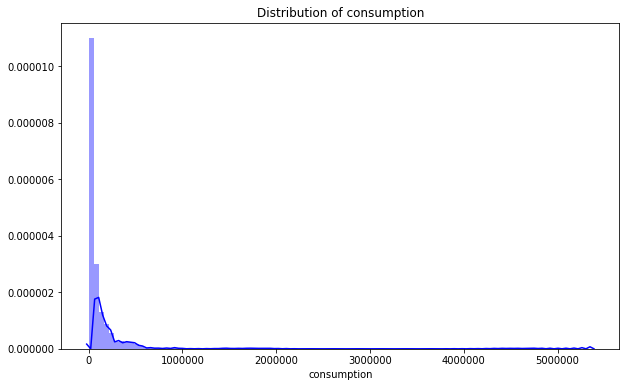

In [43]:
plot_distribution(test, 'consumption')

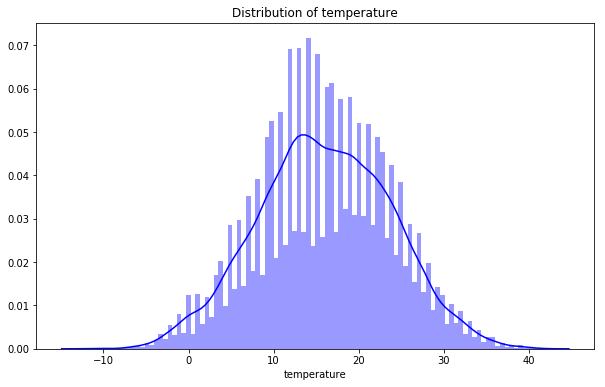

In [44]:
plot_distribution(test, 'temperature')

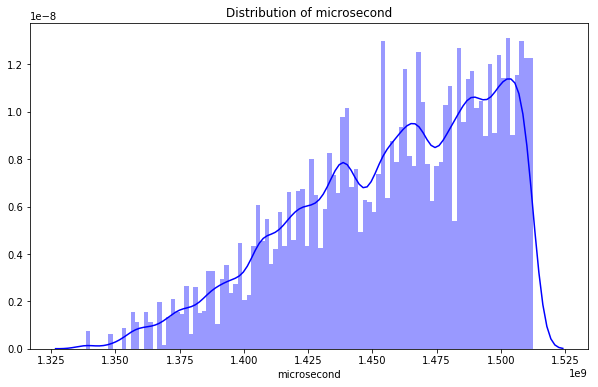

In [63]:
plot_distribution(test, 'microsecond')

## Sample Submission

In [64]:
submission = pd.read_csv('../../data/raw/submission_format.csv')

In [67]:
submission.shape

(7529, 6)

In [65]:
submission.head()

,pred_id,series_id,timestamp,temperature,consumption,prediction_window
0,0,102781,2013-03-03 00:00:00,19.931250,0.0,daily
1,1,102781,2013-03-04 00:00:00,20.034375,0.0,daily
2,2,102781,2013-03-05 00:00:00,19.189583,0.0,daily
3,3,102781,2013-03-06 00:00:00,18.397917,0.0,daily
4,4,102781,2013-03-07 00:00:00,20.762500,0.0,daily


In [68]:
submission.tail()

,pred_id,series_id,timestamp,temperature,consumption,prediction_window
7524,7524,102154,2017-08-27 19:00:00,32.666667,0.0,hourly
7525,7525,102154,2017-08-27 20:00:00,29.900000,0.0,hourly
7526,7526,102154,2017-08-27 21:00:00,28.000000,0.0,hourly
7527,7527,102154,2017-08-27 22:00:00,26.666667,0.0,hourly
7528,7528,102154,2017-08-27 23:00:00,27.300000,0.0,hourly


In [69]:
submission['prediction_window'].unique()

array(['daily', 'weekly', 'hourly'], dtype=object)

In [70]:
submission[submission.series_id == 102781]

,pred_id,series_id,timestamp,temperature,consumption,prediction_window
0,0,102781,2013-03-03 00:00:00,19.931250,0.0,daily
1,1,102781,2013-03-04 00:00:00,20.034375,0.0,daily
2,2,102781,2013-03-05 00:00:00,19.189583,0.0,daily
3,3,102781,2013-03-06 00:00:00,18.397917,0.0,daily
4,4,102781,2013-03-07 00:00:00,20.762500,0.0,daily
5,5,102781,2013-03-08 00:00:00,19.800000,0.0,daily
6,6,102781,2013-03-09 00:00:00,20.466667,0.0,daily


In [71]:
meta[meta.series_id == 102781]

,series_id,surface,base_temperature,monday_is_day_off,tuesday_is_day_off,wednesday_is_day_off,thursday_is_day_off,friday_is_day_off,saturday_is_day_off,sunday_is_day_off,total_off_day
1042,102781,large,low,0,0,0,0,0,1,1,2


In [72]:
train[train.series_id == 102781]

,series_id,timestamp,consumption,temperature,microsecond


In [75]:
test[test.series_id == 102781]

,series_id,timestamp,consumption,temperature,microsecond
0,102781,2013-02-27 00:00:00,15295.740389,17.000,1361898000
1,102781,2013-02-27 01:00:00,15163.209562,18.250,1361901600
2,102781,2013-02-27 02:00:00,15022.264079,18.000,1361905200
3,102781,2013-02-27 03:00:00,15370.420458,17.000,1361908800
4,102781,2013-02-27 04:00:00,15303.103213,16.900,1361912400
5,102781,2013-02-27 05:00:00,14553.147024,17.000,1361916000
6,102781,2013-02-27 06:00:00,40747.970202,17.000,1361919600
7,102781,2013-02-27 07:00:00,91624.030364,16.900,1361923200
8,102781,2013-02-27 08:00:00,99778.883564,17.000,1361926800
9,102781,2013-02-27 09:00:00,104295.450008,19.000,1361930400
